#ArcFace Distance Metric Test

In [ ]:
from google.colab import output
#@markdown ## Clone git repository(please do not run this cell more than one)
!git clone https://github.com/junia3/FaceBlurring.git

Cloning into 'FaceBlurring'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 210 (delta 8), reused 2 (delta 2), pack-reused 199
Receiving objects: 100% (210/210), 65.35 MiB | 39.78 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
# Make directory to get sample data 
%cd '/content/FaceBlurring/data/'
!mkdir -p 'sample_root/clean/'
%cd 'sample_root/clean/'

/content/FaceBlurring/data
/content/FaceBlurring/data/sample_root/clean


In [ ]:
# Download sample data and unzip to data directory
!gdown https://drive.google.com/uc?id=1jonSjJhywVMYHel3u8XNUQH684VyneWf
!unzip -o sample.zip
!rm sample.zip
output.clear()

In [ ]:
!pip install -U Cython cmake numpy
!pip install onnxruntime-gpu
!pip install -U insightface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
  Attempting uninstall: cmake
    Found existing installation: cmake 3.22.6
    Uninstalling cmake-3.22.6:
      Successfully uninstalled cmake-3.22.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111.0 MB 1.3 MB/s 
     |████████████████████████████████| 46 kB 5.5 MB/s 
     |████████████████████████████████| 86 kB 8.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 433 kB 5.2 MB/s 
     |████████████████████████████████| 13.1 MB 54.8 MB/s 
  Created wheel for insightface: filename=insightface-0.6.2-cp37-cp37m-linux_x86_64.whl size=983342 sha256=7511b5cd576ddb7ea97e4b1ef7302bea0e5defb493b3666689dbac196ac7d38c
  Stored in directory: /root/.cache

In [ ]:
# generate blur data with samples(It takes some time)
%cd '/content/FaceBlurring/dataset/'
!python create_blurimg.py --blur defocus --save True --label True

/content/FaceBlurring/dataset
Check all sample images(clean)...
4it [00:00, 2606.78it/s]
Create sample directories...
100% 427/427 [00:00<00:00, 83134.56it/s]
download_path: /root/.insightface/models/buffalo_l
100% 281857/281857 [04:35<00:00, 1024.47KB/s]
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'cudnn_conv_use_max_workspace': '0', 'enable_cuda_graph': '0', 'do_copy_in_default_stream': '1', 'arena_extend_strategy': 'kNextPowerOfTwo', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'gpu_external_alloc': '0', 'gpu_mem_limit': '18446744073709551615', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'device_id': '0'}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'cudnn_conv_use_max_workspace

# Embedding test with ArcFace

In [ ]:
!pip install deepface
from deepface import DeepFace
import torch
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Get clean and blur image to compare (Sample 1)

In [ ]:
import os
blur_images = os.listdir(r"../data/sample_root/blur/ffhq_samples")
clean_images = os.listdir(r"../data/sample_root/clean/ffhq_samples")

In [ ]:
img1_path = blur_images[0]
img2_path = clean_images[0]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Check if image opens

Text(0.5, 1.0, 'BLURRED IMAGE')

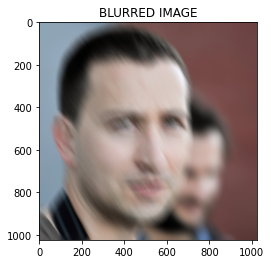

In [ ]:
from PIL import Image

im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

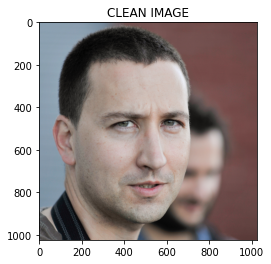

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")

arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:00<00:00, 234MB/s]


In [ ]:
print(result)

{'verified': True, 'distance': 0.45595066584672783, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


Euclidean Distance

In [ ]:
result2 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean")

In [ ]:
print(result2)

{'verified': True, 'distance': 3.3993185774798578, 'threshold': 4.15, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


L2 Distance

In [ ]:
result3 = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean_l2")

In [ ]:
print(result3)

{'verified': True, 'distance': 0.9549352500004678, 'threshold': 1.13, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


##Sample2

In [ ]:
blur_images = os.listdir(r"../data/sample_root/blur/ffhq_samples")
clean_images = os.listdir(r"../data/sample_root/clean/ffhq_samples")

In [ ]:
img1_path = blur_images[23]
img2_path = clean_images[23]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

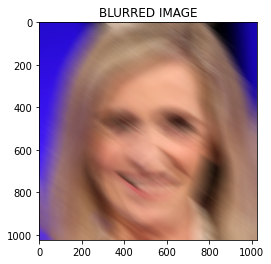

In [ ]:
from PIL import Image

im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

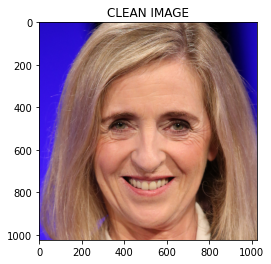

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")

In [ ]:
print(result)

{'verified': False, 'distance': 0.8921661885154166, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


Euclidean Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean")
print(result)

{'verified': False, 'distance': 8.109397150806451, 'threshold': 4.15, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


L2 Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean_l2")
print(result)

{'verified': False, 'distance': 1.3357890466053512, 'threshold': 1.13, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}



#Sample 3
 

In [ ]:
img1_path = blur_images[48]
img2_path = clean_images[48]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

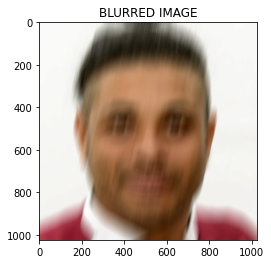

In [ ]:
from PIL import Image

im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

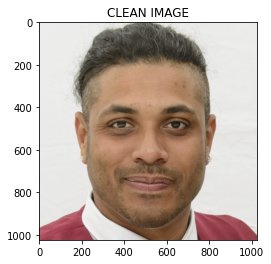

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")
print(result)

{'verified': False, 'distance': 0.8881002038045955, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


Euclidean Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean")
print(result)

{'verified': False, 'distance': 7.000848296283947, 'threshold': 4.15, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


L2 Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean_l2")
print(result)

{'verified': False, 'distance': 1.332741688253651, 'threshold': 1.13, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


#Sample 4

In [ ]:
img1_path = blur_images[52]
img2_path = clean_images[52]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

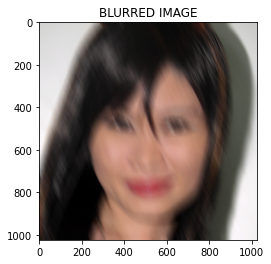

In [ ]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

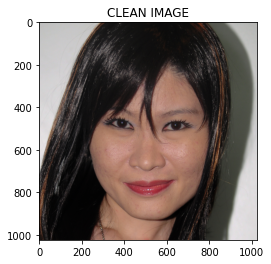

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")
print(result)

{'verified': True, 'distance': 0.41653186308818935, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


Euclidean Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean")
print(result)

{'verified': True, 'distance': 3.0703579470974085, 'threshold': 4.15, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


L2 Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean_l2")
print(result)

{'verified': True, 'distance': 0.9127232473079552, 'threshold': 1.13, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


#Sample 5

In [ ]:
img1_path = blur_images[17]
img2_path = clean_images[17]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

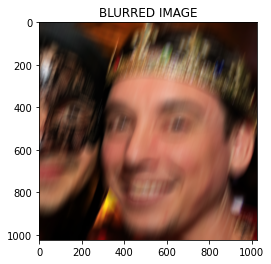

In [ ]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

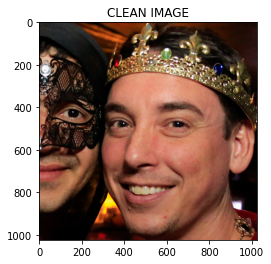

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")
print(result)

{'verified': True, 'distance': 0.0071003320478091325, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


Euclidean Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean")
print(result)

{'verified': False, 'distance': 5.080046712044406, 'threshold': 4.15, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


L2 Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean_l2")
print(result)

{'verified': True, 'distance': 0.11916653932886541, 'threshold': 1.13, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


#Sample 6 (FACE COULD NOT BE DETECTED)

In [ ]:
img1_path = blur_images[8]
img2_path = clean_images[8]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

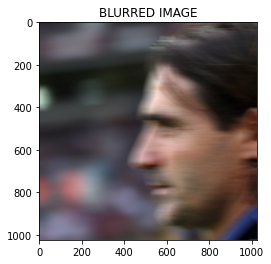

In [ ]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

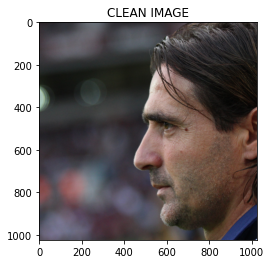

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")
print(result)

ValueError: ignored

#Sample 7

In [ ]:
img1_path = blur_images[98]
img2_path = clean_images[98]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

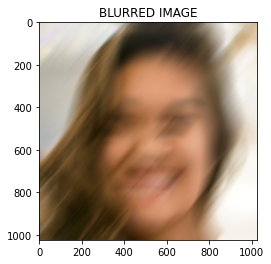

In [ ]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

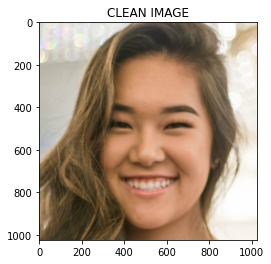

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")
print(result)

{'verified': False, 'distance': 1.0284545908217781, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean")
print(result)

{'verified': False, 'distance': 11.170353788885336, 'threshold': 4.15, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean_l2")
print(result)

{'verified': False, 'distance': 1.4341928676588642, 'threshold': 1.13, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


#Sample 8

In [ ]:
img1_path = blur_images[58]
img2_path = clean_images[58]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

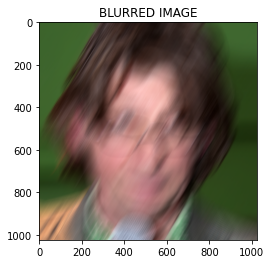

In [ ]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

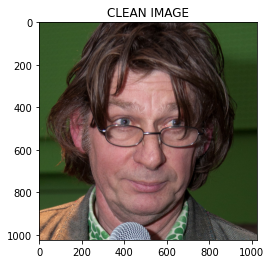

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")
print(result)

{'verified': False, 'distance': 1.062994056737834, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


Euclidean Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean")
print(result)

{'verified': False, 'distance': 8.86156868730065, 'threshold': 4.15, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


L2 Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean_l2")
print(result)

{'verified': False, 'distance': 1.458076854447552, 'threshold': 1.13, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


#Sample 9

In [ ]:
img1_path = blur_images[203]
img2_path = clean_images[203]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

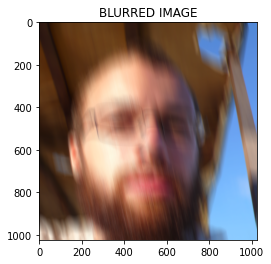

In [ ]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

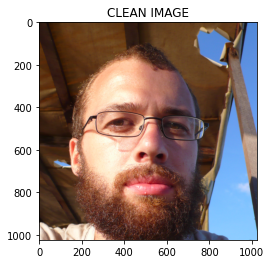

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")
print(result)

{'verified': False, 'distance': 0.9071165654118287, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


Euclidean Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean")
print(result)

{'verified': False, 'distance': 8.551702828302924, 'threshold': 4.15, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


L2 Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean_l2")
print(result)

{'verified': False, 'distance': 1.346934716615344, 'threshold': 1.13, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}


#Sample 10

In [ ]:
img1_path = blur_images[245]
img2_path = clean_images[245]
blur_img = os.path.join("../data/sample_root/blur/ffhq_samples", img1_path)
clean_img = os.path.join("../data/sample_root/clean/ffhq_samples", img2_path)

Text(0.5, 1.0, 'BLURRED IMAGE')

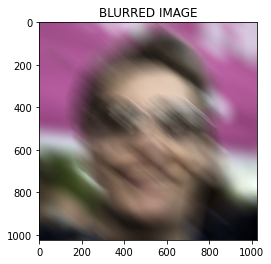

In [ ]:
im1 = Image.open(blur_img)
plt.imshow(im1)
plt.title("BLURRED IMAGE")

Text(0.5, 1.0, 'CLEAN IMAGE')

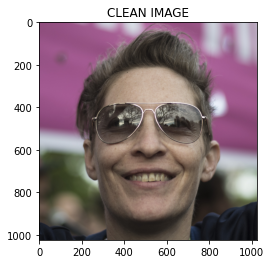

In [ ]:
im2 = Image.open(clean_img)
plt.imshow(im2)
plt.title("CLEAN IMAGE")

Cosine Similarity

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="cosine")
print(result)

{'verified': False, 'distance': 0.9607082378773169, 'threshold': 0.68, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


Euclidean Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean")
print(result)

{'verified': False, 'distance': 8.560185759589816, 'threshold': 4.15, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


L2 Distance

In [ ]:
result = DeepFace.verify(img1_path=blur_img, img2_path=clean_img, model_name="ArcFace", distance_metric="euclidean_l2")
print(result)

{'verified': False, 'distance': 1.3861516784806176, 'threshold': 1.13, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}
